In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection
from matplotlib.path import Path
import yaml

In [5]:
with open("test_small.yml") as f:
    config = yaml.safe_load(f)

In [11]:
geoms = np.array(config["detector"]["detector geometry"]))

In [98]:
from typing import TypedDict

Transform = TypedDict(
    'Transform', 
    {
        'angle': float, 
        'trans_r': float,
        'trans_t': float
    }
)

def transform_verts(verts: np.ndarray, trans: Transform)->np.ndarray:
    angle = np.deg2rad(trans['angle'])
    trans_r = trans['trans_r']
    trans_t = trans['trans_t']
    mtrans = np.array(
        [
            [np.cos(angle),-np.sin(angle)],
            [np.sin(angle),np.cos(angle)]
        ]
    )
    return np.array(
        [np.matmul(
            mtrans,
            vert+np.array([trans_r,trans_t])) for vert in verts
        ])
    
    
def geom2verts(geom:np.ndarray,trans: Transform)->np.ndarray:
    verts = np.array(
        [[geom[0],geom[2]],
         [geom[1],geom[2]],
         [geom[1],geom[3]],
         [geom[0],geom[3]],
         [geom[0],geom[2]]
        ])
    return transform_verts(verts, trans)

def verts_to_patch(verts:np.ndarray)->PatchCollection:
    codes = [
        Path.MOVETO,
        Path.LINETO,
        Path.LINETO,
        Path.LINETO,
        Path.CLOSEPOLY,
    ]
    path = Path(verts, codes)
    return patches.PathPatch(path, facecolor='orange', ec='none')

def geoms_to_patchcollection(
    geoms:np.ndarray,
    trans_list: list[Transform],
    fc:str='orange',
    ec:str='none'
)->matplotlib.patches.PathPatch:
    verts_list = []
    for trans in trans_list:
        for geom in geoms:
            verts_list.append(
                geom2verts(geom, trans)
            )
    return PatchCollection(
        [verts_to_patch(verts) for verts in verts_list],
        fc=fc,ec=ec
    )
        

In [17]:
verts=np.array([[0,0],[1,0],[1,1],[0,1],[0,0]])

In [22]:
patch = verts2rect(verts)

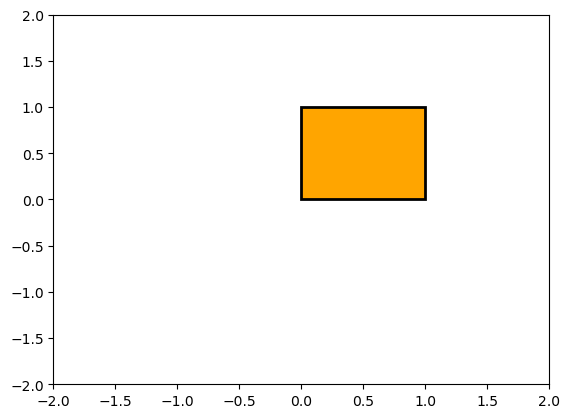

In [23]:
fig, ax = plt.subplots()
ax.add_patch(patch)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()

In [69]:
print(geoms)

[[  0.     1.     0.    49.5   -0.5    0.5    0.    10.  ]
 [  0.     1.    50.5  100.    -0.5    0.5    0.    10.  ]
 [ 49.    52.    49.    51.    -0.5    0.5    1.     0.48]
 [ 52.    55.    51.    53.    -0.5    0.5    2.     0.48]
 [ 55.    58.    49.    51.    -0.5    0.5    3.     0.48]]


In [117]:
geoms[0]=np.array([0.,1.,37.5,49.5,-0.5,0.5, 0.,10.])
geoms[1]=np.array([0.,1.,50.5,62.5,-0.5,0.5, 0.,10.])

In [122]:
fov_dims=np.array([100,100])
trans_t=-(np.max(geoms[:,3])+np.min(geoms[:,2]))/2
det_dims = np.array(
    [
        np.max(geoms[:,1])-np.min(geoms[:,0]),
        np.max(geoms[:,3])-np.min(geoms[:,2]),
        np.max(geoms[:,5])-np.min(geoms[:,4]),
    ]
)

print(trans_t)
# trans_t=0
trans_r=75
trans_list = [{'angle': angle, 
    'trans_r': trans_r,
    'trans_t': trans_t} for angle in np.arange(18)*20]
trans={
    'angle': 180, 
    'trans_r': trans_r,
    'trans_t': trans_t
}
# patch = verts2rect(transform_verts(verts,trans))
active_det_geoms = geoms[geoms[:,6]==1]
plate_geoms = geoms[geoms[:,6]==0]
det_coll = geoms_to_patchcollection(active_det_geoms,trans_list)
plate_coll = geoms_to_patchcollection(plate_geoms,trans_list,fc='gray')

coll = geoms_to_patchcollection(geoms,np.array([trans]))

-50.0


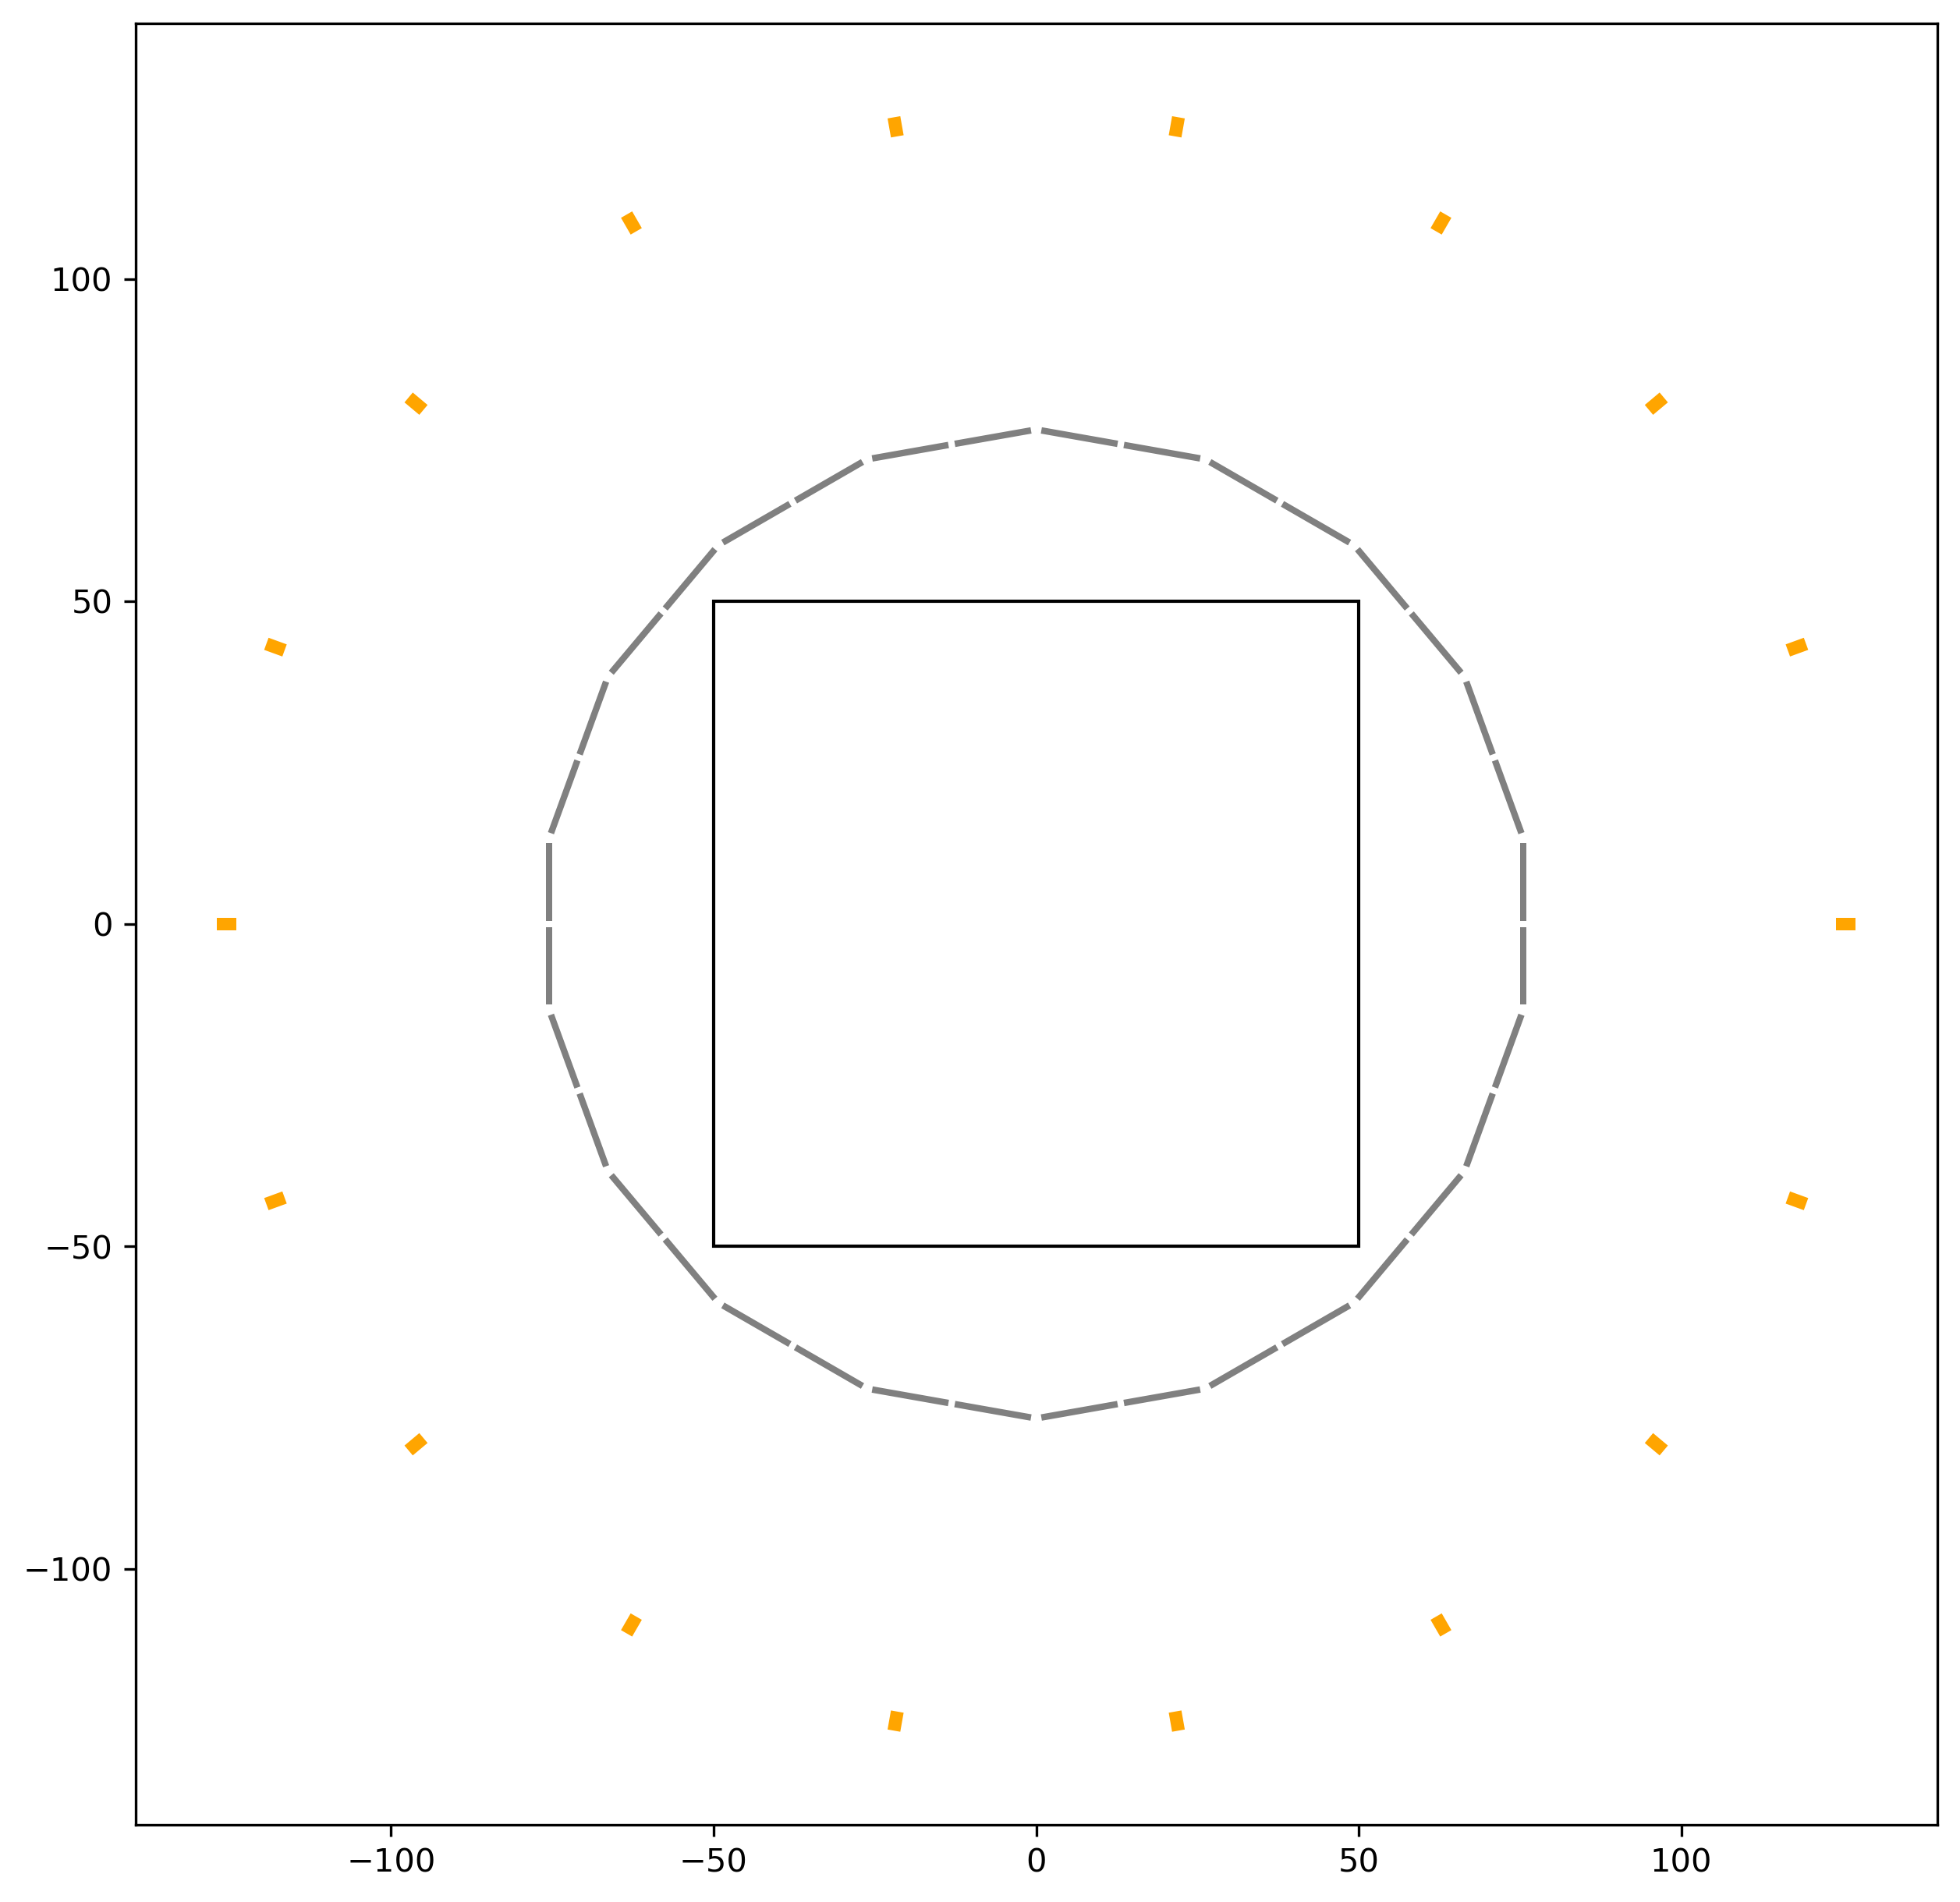

In [123]:
fig, ax = plt.subplots(figsize=(11,10),dpi=300)

ax.add_patch(plt.Rectangle(-fov_dims//2, fov_dims[0], fov_dims[1],
                     fc='none', ec='k'))
ax.add_collection(det_coll)
ax.add_collection(plate_coll)
# ax.add_collection(coll)
ax.set_xlim((trans_r+det_dims[0])*(-1.05), (trans_r+det_dims[0])*1.05)
ax.set_ylim((trans_r+det_dims[0])*(-1.05), (trans_r+det_dims[0])*1.05)
ax.set_aspect('equal')
plt.show()

In [84]:
print(np.arange(36)*10)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190 200 210 220 230 240 250 260 270 280 290 300 310 320 330 340 350]


In [96]:
print(trans_list)

[{'angle': 0, 'trans_r': 150, 'trans_t': -50.0}, {'angle': 60, 'trans_r': 150, 'trans_t': -50.0}, {'angle': 120, 'trans_r': 150, 'trans_t': -50.0}, {'angle': 180, 'trans_r': 150, 'trans_t': -50.0}, {'angle': 240, 'trans_r': 150, 'trans_t': -50.0}, {'angle': 300, 'trans_r': 150, 'trans_t': -50.0}]
